In [1]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploading dataset

df = pd.read_csv("C:/Users/iamso/Desktop/Term Project ML/term project/Names_list.csv", encoding = 'latin-1')
df

,Name,State,Region
0,Lobsang Doyon,Arunachal Pradesh,Eastern
1,Phurpa Tsering,Arunachal Pradesh,Eastern
2,Rubu Nampi,Arunachal Pradesh,Eastern
3,Takhe Tubing,Arunachal Pradesh,Eastern
4,Kading Perme,Arunachal Pradesh,Eastern
...,...,...,...
25784,SARTHAK GOSWAMI,West Bengal,Eastern
25785,SWAPNANEEL GORAI,West Bengal,Eastern
25786,ARGHYAJIT DAS,West Bengal,Eastern
25787,DEBARGHYA BARAL,West Bengal,Eastern


In [3]:
df.info()           #information about the dataset
df.describe().T      #description of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25789 entries, 0 to 25788
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    25775 non-null  object
 1   State   25789 non-null  object
 2   Region  25789 non-null  object
dtypes: object(3)
memory usage: 604.6+ KB


,count,unique,top,freq
Name,25775,23145,DEBBARMA,74
State,25789,28,Punjab,1229
Region,25789,5,Eastern,8234


In [4]:
df.shape  #total rows and columns in the dataset

(25789, 3)

In [5]:
# dropping duplicate columns
df = df.dropna().drop_duplicates()
df

,Name,State,Region
0,Lobsang Doyon,Arunachal Pradesh,Eastern
1,Phurpa Tsering,Arunachal Pradesh,Eastern
2,Rubu Nampi,Arunachal Pradesh,Eastern
3,Takhe Tubing,Arunachal Pradesh,Eastern
4,Kading Perme,Arunachal Pradesh,Eastern
...,...,...,...
25784,SARTHAK GOSWAMI,West Bengal,Eastern
25785,SWAPNANEEL GORAI,West Bengal,Eastern
25786,ARGHYAJIT DAS,West Bengal,Eastern
25787,DEBARGHYA BARAL,West Bengal,Eastern


In [6]:
df['State'].unique()

array(['Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [7]:
df['Region'].unique()

array(['Eastern', 'Northern', 'Central', 'Western', 'Southern'],
      dtype=object)

In [8]:
df['State'].value_counts()  # counting the number of values in target column

Chhattisgarh         1103
Telangana            1087
West Bengal          1057
Madhya Pradesh       1057
Jammu and Kashmir    1055
Odisha               1041
Tamil Nadu           1037
Punjab               1034
Uttar Pradesh        1009
Goa                   999
Maharashtra           994
Manipur               989
Mizoram               981
Gujarat               980
Jharkhand             945
Kerala                943
Delhi                 934
Rajasthan             933
Himachal Pradesh      927
Bihar                 895
Assam                 843
Haryana               813
Arunachal Pradesh     620
Tripura               613
Karnataka             570
Nagaland              436
Uttarakhand           212
Sikkim                 63
Name: State, dtype: int64

In [9]:
df['Region'].value_counts()  # counting the number of values in target column

Eastern     7537
Northern    4979
Central     4112
Western     3905
Southern    3637
Name: Region, dtype: int64

In [10]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[['region_encoded']] = df[['Region']].apply(le.fit_transform)
df

,Name,State,Region,region_encoded
0,Lobsang Doyon,Arunachal Pradesh,Eastern,1
1,Phurpa Tsering,Arunachal Pradesh,Eastern,1
2,Rubu Nampi,Arunachal Pradesh,Eastern,1
3,Takhe Tubing,Arunachal Pradesh,Eastern,1
4,Kading Perme,Arunachal Pradesh,Eastern,1
...,...,...,...,...
25784,SARTHAK GOSWAMI,West Bengal,Eastern,1
25785,SWAPNANEEL GORAI,West Bengal,Eastern,1
25786,ARGHYAJIT DAS,West Bengal,Eastern,1
25787,DEBARGHYA BARAL,West Bengal,Eastern,1


In [13]:
states = ['State']
regions = ['Region']

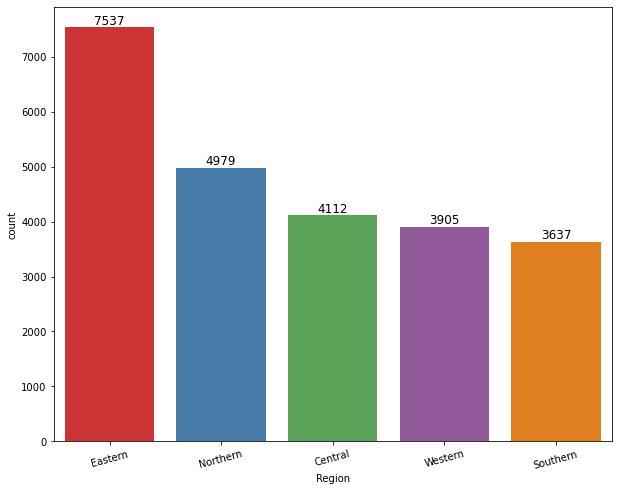

In [14]:
#plotting bar chart for categorical columns

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
axs = np.ravel(axs)

for i, col in enumerate(regions):
    plt.sca(axs[i])
    g = sns.countplot(data=df, x=col, palette="Set1")
    for rect in g.patches:
        x, y = rect.get_x(), rect.get_y()
        h, w = rect.get_height(), rect.get_width()
        plt.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12, color='k')

    plt.xticks(rotation=15)

plt.show()

In [15]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Central': 0, 'Eastern': 1, 'Northern': 2, 'Southern': 3, 'Western': 4}


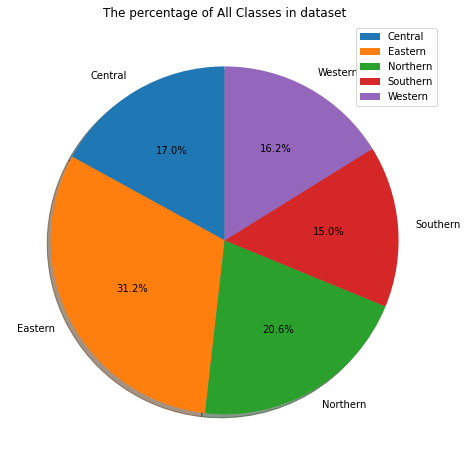

In [16]:
labels = ['Central','Eastern','Northern','Southern','Western']
sizes = [
    dict(df['region_encoded'].value_counts())[0],
    dict(df['region_encoded'].value_counts())[1],
    dict(df['region_encoded'].value_counts())[2],
    dict(df['region_encoded'].value_counts())[3],
    dict(df['region_encoded'].value_counts())[4]
]

plt.figure(figsize=(15, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(['Central','Eastern','Northern','Southern','Western'])
plt.title('The percentage of All Classes in dataset')
plt.show()

In [17]:
X = df['Name']
y = df['Region']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(X)

In [19]:
cv.get_feature_names_out()

array(['3çáònéb', 'aabasaheb', 'aabha', ..., 'æª', 'éay', 'ùøë'],
      dtype=object)

In [20]:
#splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(19336, 16999) (19336,) (4834, 16999) (4834,)


In [29]:
# Build model
from sklearn.naive_bayes import BernoulliNB
nv = BernoulliNB()
nv.fit(X_train, y_train)

BernoulliNB()

In [30]:
nv.score(X_test, y_test)

0.5

In [31]:
sample = ['tarik anowar']
vect = cv.transform(sample).toarray()

In [32]:
nv.predict(vect)

array(['Eastern'], dtype='<U8')

In [33]:
#import all classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, auc, precision_recall_curve, average_precision_score, cohen_kappa_score 
from sklearn.model_selection import cross_val_score

In [35]:
models = []
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['MultinomialNB',MultinomialNB()])
#models.append(['SVM',SVC(random_state=0, probability=True)])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])

In [36]:
def run_models(X_train, y_train, X_test, y_test, models, kcv):

    lst_1 = []
    
    for i in range(len(models)):
    
        lst_2 = []
        name = models[i][0]
        clf = models[i][1]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
        cv_score = cross_val_score(clf, X_train, y_train, cv=kcv)
        #kfold_accuracy_scores.append(cv_scores.mean())


        # Calculate evaluation metrics
        conf_matrix = confusion_matrix(y_test, y_pred)
        acc_score = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cohen_score = cohen_kappa_score(y_test, y_pred)
        
        # for Confusion Matrix
        plt.figure(figsize=(7,5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(name)
        plt.xlabel('Predict')
        plt.ylabel('Truth')
        plt.show()
        
        
        print("Classifier: ", models[i][0])
        print('')
        print("Confusion Matrix:\n", conf_matrix)
        print('')
        print("Accuracy Score: ", acc_score)
        print("Precision Score: ", precision)
        print("Recall Score: ", recall)
        print("F1 Score: ", f1)
        print("Cohen Score: ", cohen_score)
        print("K-Fold Accuracy Score: %.2f%%" % (np.mean(cv_score) * 100))
        print('')
        print("Classification Report:\n", classification_report(y_test, models[i][1].predict(X_test)))
        print("\n")
        
        lst_2.append(name)
        lst_2.append(acc_score*100)
        lst_2.append(cv_score.mean()*100)
        lst_2.append(cv_score.std()*100)
        lst_2.append(precision)
        lst_2.append(recall)
        lst_2.append(f1)
        lst_2.append(cohen_score)
        lst_1.append(lst_2)
        
    df1 = pd.DataFrame(lst_1, columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])
    df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],inplace=True,ascending=False)

    return df1

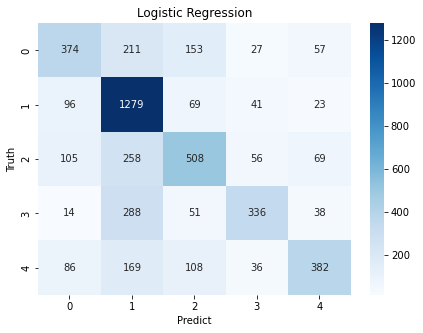

Classifier:  Logistic Regression

Confusion Matrix:
 [[ 374  211  153   27   57]
 [  96 1279   69   41   23]
 [ 105  258  508   56   69]
 [  14  288   51  336   38]
 [  86  169  108   36  382]]

Accuracy Score:  0.5955730244104261
Precision Score:  0.6032500819821269
Recall Score:  0.5955730244104261
F1 Score:  0.585006394135994
Cohen Score:  0.4689894292572049
K-Fold Accuracy Score: 58.70%

Classification Report:
               precision    recall  f1-score   support

     Central       0.55      0.45      0.50       822
     Eastern       0.58      0.85      0.69      1508
    Northern       0.57      0.51      0.54       996
    Southern       0.68      0.46      0.55       727
     Western       0.67      0.49      0.57       781

    accuracy                           0.60      4834
   macro avg       0.61      0.55      0.57      4834
weighted avg       0.60      0.60      0.59      4834





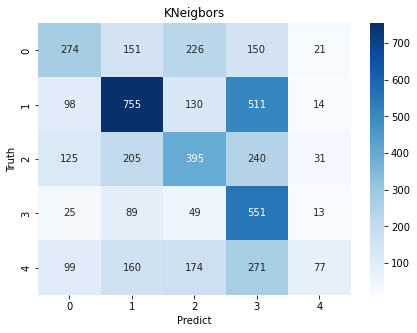

Classifier:  KNeigbors

Confusion Matrix:
 [[274 151 226 150  21]
 [ 98 755 130 511  14]
 [125 205 395 240  31]
 [ 25  89  49 551  13]
 [ 99 160 174 271  77]]

Accuracy Score:  0.42449317335539927
Precision Score:  0.4596093128232562
Recall Score:  0.42449317335539927
F1 Score:  0.40564766124297696
Cohen Score:  0.27156100269027916
K-Fold Accuracy Score: 42.89%

Classification Report:
               precision    recall  f1-score   support

     Central       0.44      0.33      0.38       822
     Eastern       0.56      0.50      0.53      1508
    Northern       0.41      0.40      0.40       996
    Southern       0.32      0.76      0.45       727
     Western       0.49      0.10      0.16       781

    accuracy                           0.42      4834
   macro avg       0.44      0.42      0.38      4834
weighted avg       0.46      0.42      0.41      4834





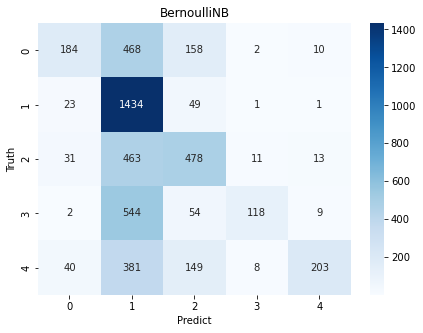

Classifier:  BernoulliNB

Confusion Matrix:
 [[ 184  468  158    2   10]
 [  23 1434   49    1    1]
 [  31  463  478   11   13]
 [   2  544   54  118    9]
 [  40  381  149    8  203]]

Accuracy Score:  0.5
Precision Score:  0.6243571372845494
Recall Score:  0.5
F1 Score:  0.45324397216292933
Cohen Score:  0.3129425177642192
K-Fold Accuracy Score: 47.11%

Classification Report:
               precision    recall  f1-score   support

     Central       0.66      0.22      0.33       822
     Eastern       0.44      0.95      0.60      1508
    Northern       0.54      0.48      0.51       996
    Southern       0.84      0.16      0.27       727
     Western       0.86      0.26      0.40       781

    accuracy                           0.50      4834
   macro avg       0.67      0.42      0.42      4834
weighted avg       0.62      0.50      0.45      4834





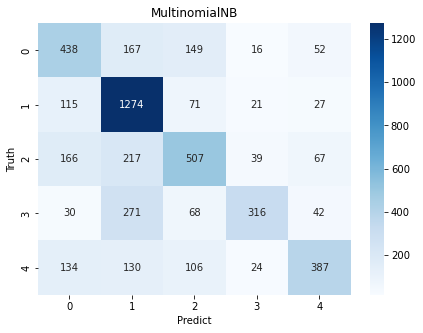

Classifier:  MultinomialNB

Confusion Matrix:
 [[ 438  167  149   16   52]
 [ 115 1274   71   21   27]
 [ 166  217  507   39   67]
 [  30  271   68  316   42]
 [ 134  130  106   24  387]]

Accuracy Score:  0.6044683491932147
Precision Score:  0.6162922678376379
Recall Score:  0.6044683491932147
F1 Score:  0.5957169524659103
Cohen Score:  0.48330260950795945
K-Fold Accuracy Score: 59.52%

Classification Report:
               precision    recall  f1-score   support

     Central       0.50      0.53      0.51       822
     Eastern       0.62      0.84      0.71      1508
    Northern       0.56      0.51      0.53       996
    Southern       0.76      0.43      0.55       727
     Western       0.67      0.50      0.57       781

    accuracy                           0.60      4834
   macro avg       0.62      0.56      0.58      4834
weighted avg       0.62      0.60      0.60      4834





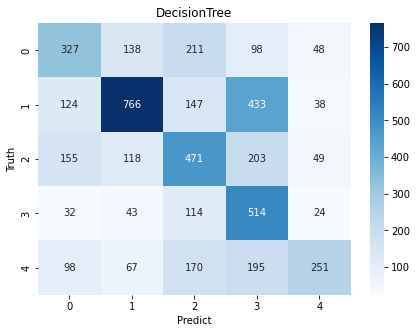

Classifier:  DecisionTree

Confusion Matrix:
 [[327 138 211  98  48]
 [124 766 147 433  38]
 [155 118 471 203  49]
 [ 32  43 114 514  24]
 [ 98  67 170 195 251]]

Accuracy Score:  0.48179561439801405
Precision Score:  0.5263160340007772
Recall Score:  0.48179561439801405
F1 Score:  0.4837833084192196
Cohen Score:  0.34818749522612846
K-Fold Accuracy Score: 47.94%

Classification Report:
               precision    recall  f1-score   support

     Central       0.44      0.40      0.42       822
     Eastern       0.68      0.51      0.58      1508
    Northern       0.42      0.47      0.45       996
    Southern       0.36      0.71      0.47       727
     Western       0.61      0.32      0.42       781

    accuracy                           0.48      4834
   macro avg       0.50      0.48      0.47      4834
weighted avg       0.53      0.48      0.48      4834





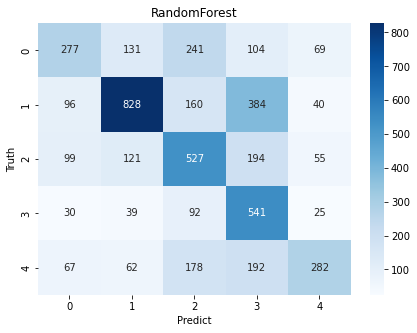

Classifier:  RandomForest

Confusion Matrix:
 [[277 131 241 104  69]
 [ 96 828 160 384  40]
 [ 99 121 527 194  55]
 [ 30  39  92 541  25]
 [ 67  62 178 192 282]]

Accuracy Score:  0.5078609846917667
Precision Score:  0.5463644926770035
Recall Score:  0.5078609846917667
F1 Score:  0.5075732636613636
Cohen Score:  0.37935086630637627
K-Fold Accuracy Score: 50.16%

Classification Report:
               precision    recall  f1-score   support

     Central       0.49      0.34      0.40       822
     Eastern       0.70      0.55      0.62      1508
    Northern       0.44      0.53      0.48       996
    Southern       0.38      0.74      0.51       727
     Western       0.60      0.36      0.45       781

    accuracy                           0.51      4834
   macro avg       0.52      0.50      0.49      4834
weighted avg       0.55      0.51      0.51      4834





In [37]:
results = run_models(X_train, y_train, X_test, y_test, models, 10)

In [38]:
results

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,Precision,Recall,F1 Score,Cohen-Kappa Score
3,MultinomialNB,60.446835,59.515964,0.767137,0.616292,0.604468,0.595717,0.483303
0,Logistic Regression,59.557302,58.703991,0.916629,0.603250,0.595573,0.585006,0.468989
5,RandomForest,50.786098,50.160381,0.922068,0.546364,0.507861,0.507573,0.379351
2,BernoulliNB,50.000000,47.109064,0.913391,0.624357,0.500000,0.453244,0.312943
4,DecisionTree,48.179561,47.936530,0.772678,0.526316,0.481796,0.483783,0.348187
1,KNeigbors,42.449317,42.894079,2.008854,0.459609,0.424493,0.405648,0.271561
